# Downloading data with ONE light

We import the libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from oneibl.onelight import ONE
one = ONE()

We set the current repository to a figshare article, that was specially created with ONE light:

In [3]:
one.set_figshare_url("https://figshare.com/articles/steinmetz/9974357")

We search all sessions that have files with a given dataset type. We could pass multiple dataset types. Here, we get all sessions that have spikes:

In [4]:
sessions = one.search(['spikes'])

Within a repository, every session is uniquely identified by its full name, which has the following structure: `labname/Subjects/subjectname/date/session`.

In [5]:
sessions

['nicklab/Subjects/Cori/2016-12-14/001',
 'nicklab/Subjects/Cori/2016-12-17/001',
 'nicklab/Subjects/Cori/2016-12-18/001',
 'nicklab/Subjects/Forssmann/2017-11-01/001',
 'nicklab/Subjects/Forssmann/2017-11-02/001',
 'nicklab/Subjects/Forssmann/2017-11-04/001',
 'nicklab/Subjects/Forssmann/2017-11-05/001',
 'nicklab/Subjects/Hench/2017-06-15/001',
 'nicklab/Subjects/Hench/2017-06-16/001',
 'nicklab/Subjects/Hench/2017-06-17/001',
 'nicklab/Subjects/Hench/2017-06-18/001',
 'nicklab/Subjects/Lederberg/2017-12-05/001',
 'nicklab/Subjects/Lederberg/2017-12-06/001',
 'nicklab/Subjects/Lederberg/2017-12-07/001',
 'nicklab/Subjects/Lederberg/2017-12-08/001',
 'nicklab/Subjects/Lederberg/2017-12-09/001',
 'nicklab/Subjects/Lederberg/2017-12-10/001',
 'nicklab/Subjects/Lederberg/2017-12-11/001',
 'nicklab/Subjects/Moniz/2017-05-15/001',
 'nicklab/Subjects/Moniz/2017-05-16/001',
 'nicklab/Subjects/Moniz/2017-05-18/001',
 'nicklab/Subjects/Muller/2017-01-07/001',
 'nicklab/Subjects/Muller/2017-01-

We take the first session.

In [6]:
session = sessions[0]

What are the dataset types contained in this session?

In [8]:
one.list(session)

['Cori_2016-12-14_M2_g0_t0.imec',
 'Cori_2016-12-14_V1_g0_t0.imec',
 'channels.brainLocation',
 'channels.probe',
 'channels.rawRow',
 'channels.site',
 'channels.sitePositions',
 'clusters._phy_annotation',
 'clusters.depths',
 'clusters.originalIDs',
 'clusters.peakChannel',
 'clusters.probes',
 'clusters.templateWaveformChans',
 'clusters.templateWaveforms',
 'clusters.waveformDuration',
 'eye.area',
 'eye.timestamps',
 'eye.xyPos',
 'face.motionEnergy',
 'face.timestamps',
 'lickPiezo.raw',
 'lickPiezo.timestamps',
 'licks.times',
 'passiveBeeps.times',
 'passiveValveClick.times',
 'passiveVisual.contrastLeft',
 'passiveVisual.contrastRight',
 'passiveVisual.times',
 'passiveWhiteNoise.times',
 'probes.description',
 'probes.insertion',
 'probes.rawFilename',
 'probes.sitePositions',
 'sparseNoise.positions',
 'sparseNoise.times',
 'spikes.amps',
 'spikes.clusters',
 'spikes.depths',
 'spikes.times',
 'spontaneous.intervals',
 'trials.feedbackType',
 'trials.feedback_times',
 'tria

We can load either single files, or full objects.
First, let's load the spike times:

In [9]:
one.load_dataset(session, 'spikes.times')

12:59:12.004 [I] onelight:345         Downloading https://ndownloader.figshare.com/files/17984294 to /home/cyrille/.one/data/figshare_00/nicklab/Subjects/Cori/2016-12-14/001/alf/spikes.times.npy.


array([[3.36666667e-03],
       [4.73333333e-03],
       [6.76666667e-03],
       ...,
       [2.70264303e+03],
       [2.70264313e+03],
       [2.70264316e+03]])

Now, we load all `spikes.*` files:

In [10]:
spikes = one.load_object(session, 'spikes')

12:59:13.499 [I] onelight:345         Downloading https://ndownloader.figshare.com/files/17984285 to /home/cyrille/.one/data/figshare_00/nicklab/Subjects/Cori/2016-12-14/001/alf/spikes.amps.npy.
12:59:14.942 [I] onelight:345         Downloading https://ndownloader.figshare.com/files/17984288 to /home/cyrille/.one/data/figshare_00/nicklab/Subjects/Cori/2016-12-14/001/alf/spikes.clusters.npy.
12:59:15.871 [I] onelight:345         Downloading https://ndownloader.figshare.com/files/17984291 to /home/cyrille/.one/data/figshare_00/nicklab/Subjects/Cori/2016-12-14/001/alf/spikes.depths.npy.


The `spikes` object is an instance of a dictionary, that also allows for the more convenient syntax interface `spikes.times` in addition to `spikes['times']`. Here, we display a raster plot of the first 100,000 spikes:

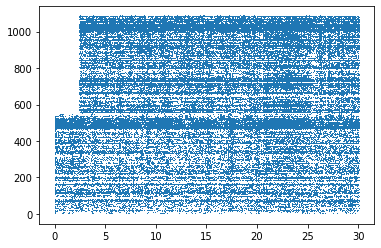

In [11]:
plt.plot(spikes.times[:100000], spikes.clusters[:100000], ',');